<a href="https://colab.research.google.com/github/Pedro-Prestes/learning/blob/master/Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# importando os dados
df = pd.read_csv('/content/drive/My Drive/Aulas_EscolaDataScience/sao_paulo-od_zones_2017-2020-1-All-HourlyAggregate.csv')

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()



Dimensões do Dataset 
Variáveis:  7 
Entradas:  2969273


,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,303,169,5,2124.98,620.16,2072.14,1.22
1,302,179,5,2713.35,474.05,2676.71,1.17
2,213,17,13,2070.42,379.81,2032.33,1.22
3,212,27,13,2469.65,437.49,2430.96,1.20
4,211,37,13,2102.72,760.82,2006.15,1.33


In [ ]:
# selecionando as features numéricas
df_num = pd.DataFrame(df.iloc[:, [3,4,5,6]].values)

# salvando os nomes das colunas
cols = df.iloc[:, [3,4,5,6]].columns

In [ ]:
# colocando os dados na mesma escala
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_num))
scaled.columns = cols

scaled.head()

,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,0.250696,0.143792,0.247795,0.012478
1,0.321286,0.109245,0.320250,0.009507
2,0.244150,0.086963,0.243024,0.012478
3,0.292048,0.100601,0.290798,0.011289
4,0.248025,0.177051,0.239887,0.019014


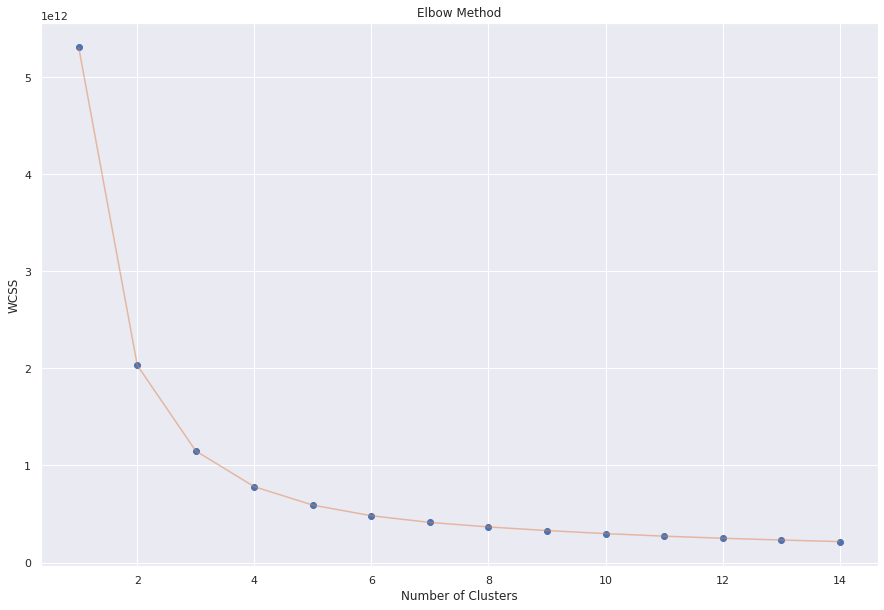

In [ ]:
# dados originais
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(df_num)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)

# plotando o Elbow Method  
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

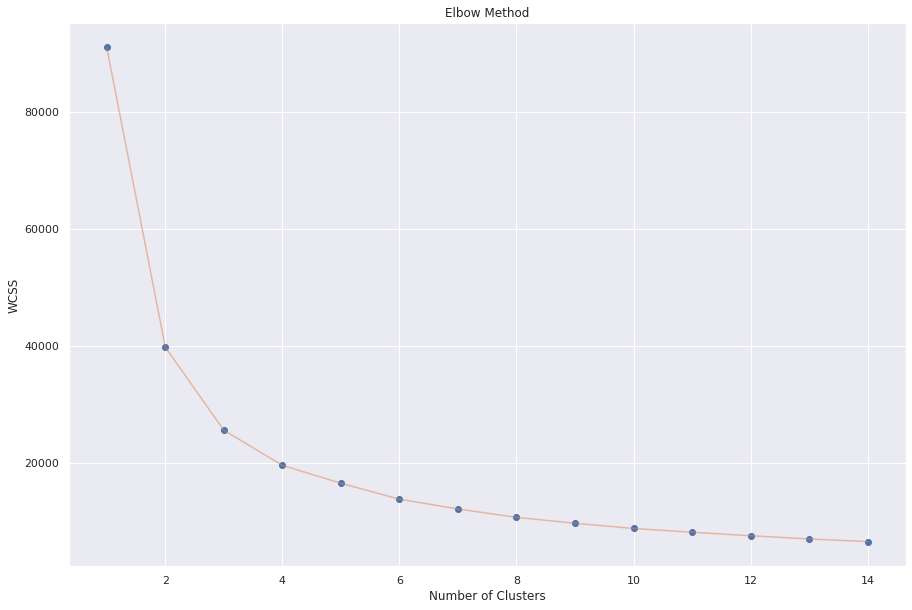

In [ ]:
# Dados Padronizados
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(scaled)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)
  
# plotando o Elbow Method  
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [ ]:
# verificar os resultados
print('Lista Com Erros: ', wcss)

Lista Com Erros:  [91022.74120148447, 39741.374300313226, 25522.69275115319, 19520.87263180121, 16448.886418479, 13727.960939690125, 12044.603339475409, 10618.559998071247, 9599.802501463311, 8713.051001617501, 8066.179001375682, 7469.633630187508, 6922.78537977182, 6468.028781107506]


In [ ]:
# diferença entre os elementos
dif = np.diff(wcss)
print('Diferença Entre os Elementos: ', dif)

Diferença Entre os Elementos:  [-51281.36690117 -14218.68154916  -6001.82011935  -3071.98621332
  -2720.92547879  -1683.35760021  -1426.0433414   -1018.75749661
   -886.75149985   -646.87200024   -596.54537119   -546.84825042
   -454.75659866]


In [ ]:
# instanciando o modelo
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

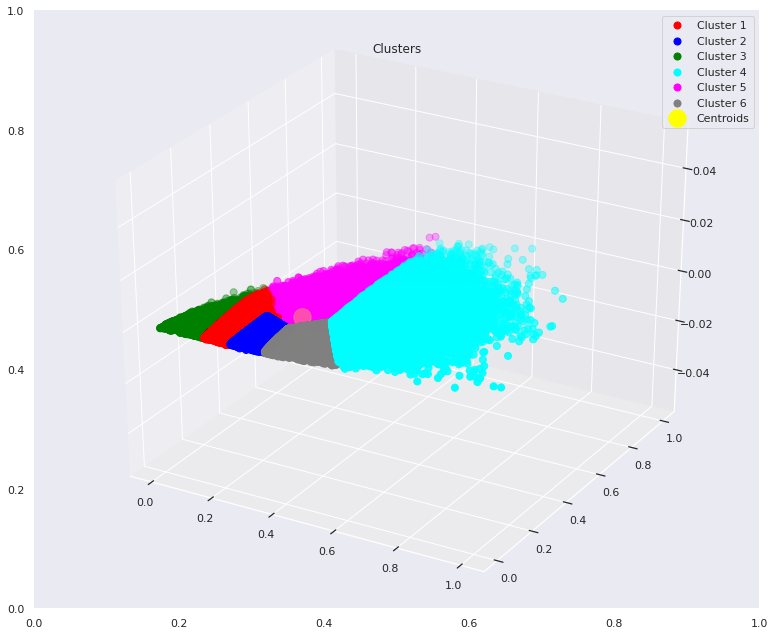

In [ ]:
# visualizando os clusters
fig, ax = plt.subplots(figsize=(13,11))
scaled = scaler.fit_transform(df_num)
# definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')
# plotando os clusters
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [ ]:
# visualizando as previsões
y_kmeans

array([1, 5, 1, ..., 5, 4, 2], dtype=int32)

In [ ]:
# convertendo as previsões para um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['cluster']

# previsões como um df
print(kmeans.shape)
kmeans.head()



(2969273, 1)


,cluster
0,1
1,5
2,1
3,1
4,1


In [ ]:
# concatenando os clusters 
df = pd.concat([df, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(2969273, 8)


,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,cluster
0,303,169,5,2124.98,620.16,2072.14,1.22,1
1,302,179,5,2713.35,474.05,2676.71,1.17,5
2,213,17,13,2070.42,379.81,2032.33,1.22,1
3,212,27,13,2469.65,437.49,2430.96,1.20,1
4,211,37,13,2102.72,760.82,2006.15,1.33,1


In [ ]:
# checando valores nulos
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

cluster                                     0.0
geometric_standard_deviation_travel_time    0.0
geometric_mean_travel_time                  0.0
standard_deviation_travel_time              0.0
mean_travel_time                            0.0
hod                                         0.0
dstid                                       0.0
sourceid                                    0.0
dtype: float64

In [ ]:
# média de popularidade por cluster
df.groupby(['cluster']).hod.mean().sort_values(ascending=False)

cluster
5    13.380942
3    12.941768
1    12.817642
4    12.433247
0    11.244833
2    10.548098
Name: hod, dtype: float64

In [ ]:
# conferindo o número de músicas por cluster
df['cluster'].value_counts()

0    869522
1    752875
2    522660
5    394887
4    258769
3    170560
Name: cluster, dtype: int64

In [ ]:
# checando as músicas no cluster
df.loc[df['cluster'] == 3][:10]

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,cluster
6,491,251,17,4008.83,853.78,3904.85,1.27,3
11,492,241,17,3800.52,1109.67,3634.73,1.36,3
124,331,366,17,3976.26,1635.43,3706.22,1.44,3
144,439,305,9,4134.29,1421.84,3938.11,1.35,3
201,477,29,10,3603.09,1195.75,3321.88,1.65,3
235,73,438,20,4138.67,739.51,4073.75,1.19,3
239,378,305,19,4135.71,848.82,4051.72,1.22,3
268,132,308,10,4025.45,655.47,3971.71,1.18,3
326,366,286,8,4513.04,1605.29,4203.74,1.47,3
338,200,26,5,4011.46,1781.67,3655.04,1.53,3
